In [393]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from fancyimpute import KNN

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [422]:
gold = pd.read_csv('../data/gold.csv', parse_dates=['date'])  
fx = pd.read_csv('../data/usdrub.csv', parse_dates=['date'])
train = pd.read_csv('../data/clean_train_all_cols_chase.csv', parse_dates=['timestamp'], index_col='id')
moscow = pd.read_csv('../data/moscow_index_raw.csv',header=None,parse_dates=[0])

In [423]:
moscow.columns = ['date','price_moscow']

In [424]:
fx.price = fx.price.astype(float)
gold.price = gold.price.astype(float)

In [425]:
df = pd.merge(gold,fx,how="left",on="date",suffixes=["_gold","_usdrub"])

In [426]:
df = df[df.date>"2010-01-01"]

In [428]:
train['month_year'] = pd.PeriodIndex(train['timestamp'], freq='M').strftime('%m/%y')
df['month_year'] = pd.PeriodIndex(df['date'], freq='M').strftime('%m/%y')
moscow['month_year'] = pd.PeriodIndex(moscow['date'], freq='M').strftime('%m/%y')

In [ ]:
train.okurg_district

In [438]:
train_grouped = train.groupby(['okurg_district','month_year',])
train_grouped = train_grouped.price_full.median()

In [450]:
districts = train.okurg_district.unique().tolist()

In [493]:
train_multiples = pd.DataFrame({'month_year':train.month_year.unique().tolist()})

In [495]:

for d in districts:
#     temp = pd.concat([temp,pd.DataFrame({d:train_grouped[d]})])
    x = pd.DataFrame({d:train_grouped[d]}).reset_index()
    train_multiples = pd.merge(train_multiples,x,how="left")

In [496]:
dfg = df.groupby('month_year').mean()

In [497]:
dfg['gold_in_rub'] = dfg.price_gold * dfg.price_usdrub

In [498]:
dfg.reset_index(inplace=True)

In [499]:
dfg['date'] = pd.to_datetime(dfg.month_year,format="%m/%y")

In [500]:
dfg.sort_values('date',inplace=True)

In [501]:
dfg.reset_index(inplace=True,drop=True)

In [502]:
dfg = dfg[['gold_in_rub','month_year','date']]

In [503]:
# dfg['nominal_index'] = dfg.gold_in_rub / dfg.gold_in_rub[0]

In [504]:
# dfg.set_index('month_year',inplace=True)

In [505]:
moscow = moscow.groupby('month_year').price_moscow.mean().to_frame()
# moscow.reset_index(inplace=True)

In [506]:
moscow.reset_index(inplace=True)

In [515]:
dfg = pd.merge(dfg,train_multiples,how="left",on="month_year")

In [516]:
# temp = temp[~temp.isnull().any(axis=1)]

In [519]:
dfg['gold_1m_lag'] = dfg.gold_in_rub.shift(periods=-1)
dfg['gold_2m_lag'] = dfg.gold_in_rub.shift(periods=-2)
dfg['gold_3m_lag'] = dfg.gold_in_rub.shift(periods=-3)
dfg['gold_4m_lag'] = dfg.gold_in_rub.shift(periods=-4)
dfg['gold_5m_lag'] = dfg.gold_in_rub.shift(periods=-5)
dfg['gold_6m_lag'] = dfg.gold_in_rub.shift(periods=-6)
dfg['gold_7m_lag'] = dfg.gold_in_rub.shift(periods=-7)
dfg['gold_8m_lag'] = dfg.gold_in_rub.shift(periods=-8)
dfg['gold_9m_lag'] = dfg.gold_in_rub.shift(periods=-9)
dfg['gold_10m_lag'] = dfg.gold_in_rub.shift(periods=-10)
dfg['gold_11m_lag'] = dfg.gold_in_rub.shift(periods=-11)
dfg['gold_12m_lag'] = dfg.gold_in_rub.shift(periods=-12)
# dfg['gold_13m_lag'] = dfg.gold_in_rub.shift(periods=-13)
# dfg['gold_14m_lag'] = dfg.gold_in_rub.shift(periods=-14)
# dfg['gold_15m_lag'] = dfg.gold_in_rub.shift(periods=-15)
# dfg['gold_16m_lag'] = dfg.gold_in_rub.shift(periods=-16)

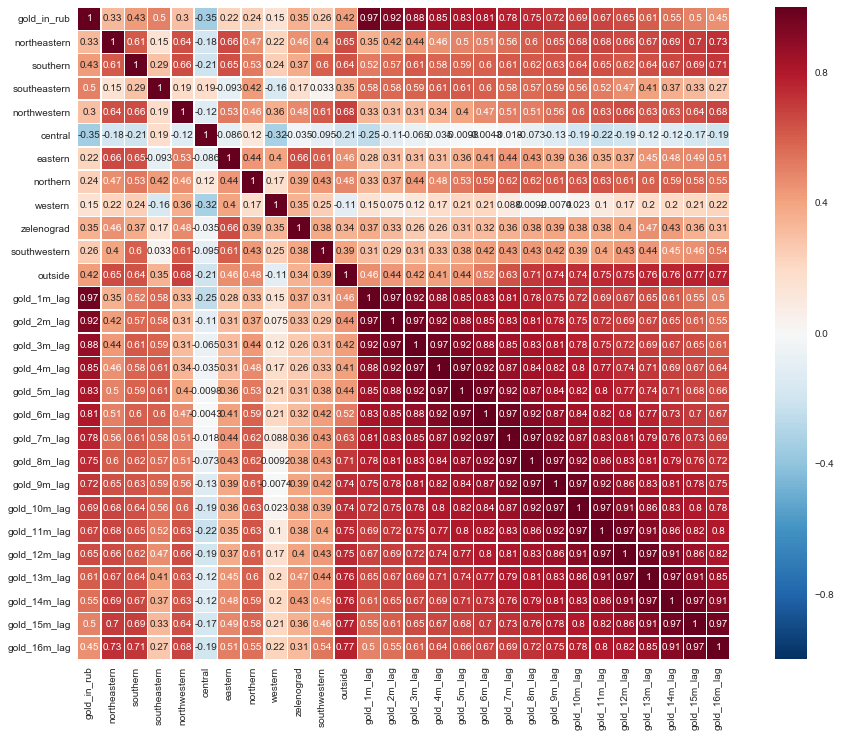

In [520]:
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='90')
sns.heatmap(dfg.corr(), square=True, linewidths=.5, annot=True)

In [522]:
gold_dict = {k:'gold_1m_lag' for k in districts}

In [523]:
gold_dict

{'central': 'gold_1m_lag',
 'eastern': 'gold_1m_lag',
 'northeastern': 'gold_1m_lag',
 'northern': 'gold_1m_lag',
 'northwestern': 'gold_1m_lag',
 'outside': 'gold_1m_lag',
 'southeastern': 'gold_1m_lag',
 'southern': 'gold_1m_lag',
 'southwestern': 'gold_1m_lag',
 'western': 'gold_1m_lag',
 'zelenograd': 'gold_1m_lag'}

In [529]:
gold_dict = {
#     'central': np.nan,
    'eastern': 'gold_7m_lag',
    'northeastern': 'gold_12m_lag',
    'northern': 'gold_11m_lag',
    'northwestern': 'gold_12m_lag',
    'outside': 'gold_12m_lag',
    'southeastern': 'gold_4m_lag',
    'southern': 'gold_11m_lag',
    'southwestern': 'gold_7m_lag',
    'western': 'gold_6m_lag',
    'zelenograd': 'gold_12m_lag'
}

In [525]:
dfg['nominal_index'] = dfg.gold_12m_lag / dfg.gold_12m_lag[0]

In [526]:
dfg.set_index('month_year',inplace=True)
dfg.nominal_index.to_frame().to_csv('../data/gold_rub.csv')

In [528]:
dfg

,gold_in_rub,date,northeastern,southern,southeastern,northwestern,central,eastern,northern,western,zelenograd,southwestern,outside,gold_1m_lag,gold_2m_lag,gold_3m_lag,gold_4m_lag,gold_5m_lag,gold_6m_lag,gold_7m_lag,gold_8m_lag,gold_9m_lag,gold_10m_lag,gold_11m_lag,gold_12m_lag,gold_13m_lag,gold_14m_lag,gold_15m_lag,gold_16m_lag,nominal_index
month_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/10,nan,2010-01-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,33477.1,36745.3,38531.2,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,1.0
02/10,nan,2010-02-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,33477.1,36745.3,38531.2,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,1.0
03/10,nan,2010-03-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,33477.1,36745.3,38531.2,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,1.0
04/10,33477.1,2010-04-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36745.3,38531.2,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,1.0
05/10,36745.3,2010-05-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,38531.2,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,54788.6,1.0
06/10,38531.2,2010-06-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36601.4,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,54788.6,52117.2,1.0
07/10,36601.4,2010-07-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36896.6,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,54788.6,52117.2,53591.6,1.1
08/10,36896.6,2010-08-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,39155.1,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,54788.6,52117.2,53591.6,51983.9,1.2
09/10,39155.1,2010-09-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,40710.1,42520.2,42917.2,40995.5,40109.1,40431.1,41502.4,42298.3,42723.0,43746.2,50750.2,54788.6,52117.2,53591.6,51983.9,51759.4,1.3


In [541]:
answer = {}
for k,v in gold_dict.items():
    answer[k] = dfg[v]

In [542]:
results = pd.DataFrame(answer)
results['central'] = 1

In [552]:
results = results.iloc[12:-1,:]

In [553]:
results.apply(lambda x: x / x[0], axis=0).to_csv('../data/gold_district.csv')